In [2]:
# 판다스 import
import pandas as pd

In [4]:
# 데이터프레임 생성
# 딕셔너리 형태로 가져온다.
data = {'이름': ['홍길동', '임꺽정', '이순신'],
        '나이': [30, 35, 40],
        '도시': ['서울', '부산', '광주']}
# DataFrame 함수 활용
df = pd.DataFrame(data)
df

,이름,나이,도시
0,홍길동,30,서울
1,임꺽정,35,부산
2,이순신,40,광주


In [5]:
import pandas as pd

# 시리즈 생성
names = pd.Series(['홍길동', '임꺽정', '이순신'])

In [7]:
type(names)

pandas.core.series.Series

In [14]:
import pandas as pd

# 엑셀 파일을 DataFrame으로 불러오기
# df = pd.read_excel("example.xlsx")
df = pd.read_csv("/content/sample_data/california_housing_train.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [15]:
# 요구정의서 / 칼럼에 대한 히스토리(의미)를 파악한 뒤에 볼 것!
# 데이터를 빠르게 점검할 때(head)
df.head()   # 상위 5개
df.tail()   # 하위 5개

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [16]:
# 데이터 요약 정보 출력(info)
df.info()

# Null
# 1. Null이 있으면 머신러닝 모델의 대부분 돌리지 못함(딥러닝도 거의 동일)
# xgboost / 딥러닝 일부 모델 중 옵션변경 (Null -> 하나의 값)
# Null -> 0 (x) NaN (x) Null을 임의로 치환을 하는건 굉장히 위험하다.
# Null 최대한 제거하고 분석하는 것을 추천
# Null을 가지고 있는 데이터가 다른 데이터와 다른지 아닌지 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [17]:
# DataFrame의 통계적 요약 정보 출력
# 1. Min / Max -> 99999999 / -9999999 / 이상한 문자로 된 값 ********
# 2. Mean -> 평균이 우리가 아는 수치와 비슷한지
# 3. 25% 50% 75% -> 데이터가 편중되어 있는지 아니면 잘 분포되어 있는지 -> 표준편차
# 3번예) 1 1 1 1 1 1 1 1 1 1 1 2 3 4 5 (우리 어플 사용량!)
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

In [ ]:
# inplace 매개변수를 사용하지 않는 경우
df = df.dropna()

# inplace=True를 사용하는 경우
df.dropna(inplace=True) # 수정된 값이 원본에 반영됨

In [21]:
import pandas as pd
import numpy as np

# 샘플 데이터프레임 생성
# 문자형 데이터는 describe() 사용해도 통계량이 나오지 않음 -> count()정도만 가능
data = {'이름': ['홍길동', '임꺽정', None],
        '나이': [30, None, 40],
        '도시': ['서울', '부산', '광주']}
df = pd.DataFrame(data)

# 결측치가 포함된 데이터프레임 출력
print("원본 데이터프레임:\n", df)

원본 데이터프레임:
      이름    나이  도시
0   홍길동  30.0  서울
1   임꺽정   NaN  부산
2  None  40.0  광주


In [23]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      2 non-null      object 
 1   나이      2 non-null      float64
 2   도시      3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 200.0+ bytes


,나이
count,2.000000
mean,35.000000
std,7.071068
min,30.000000
25%,32.500000
50%,35.000000
75%,37.500000
max,40.000000


In [24]:
# 결측치 제거
df.dropna(inplace=True)

# 결측치가 제거된 데이터프레임 출력
print("\n결측치 제거 후 데이터프레임:\n", df)


결측치 제거 후 데이터프레임:
     이름    나이  도시
0  홍길동  30.0  서울


# 데이터프레임 / 시리즈

In [25]:
# Pandas DataFrame 예시
import pandas as pd

df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'Berlin']
})

# 각 속성 호출
print("Shape:", df.shape)
print("Data Types:\n", df.dtypes)
print("Index:", df.index)
print("Columns:", df.columns)

Shape: (3, 3)
Data Types:
 Name    object
Age      int64
City    object
dtype: object
Index: RangeIndex(start=0, stop=3, step=1)
Columns: Index(['Name', 'Age', 'City'], dtype='object')


In [26]:
print("Shape of DataFrame:", df.shape)

Shape of DataFrame: (3, 3)


In [27]:
print("Data Types:\n", df.dtypes)

Data Types:
 Name    object
Age      int64
City    object
dtype: object


In [28]:
print("Index:", df.index)

Index: RangeIndex(start=0, stop=3, step=1)


In [29]:
# 데이터 타입을 변경할 때? -> astype()
# 시간을 변경할때만 to_datetime()을 사용하자

import pandas as pd

# 예시 데이터프레임 생성
data = {
    'Name': ['Alice', 'Bob'],  # 문자열 타입
    'Age': ['25', '30'],       # 숫자 데이터를 문자열로 표현
    'Member': ['True', 'False'],  # 불린 데이터를 문자열로 표현
    'Join Date': ['2021-01-01', '2021-07-01']  # 날짜 데이터를 문자열로 표현
}

# DB -> 문자열로 저장하면 메모리 / 저장용량 효율적

df = pd.DataFrame(data)

# 데이터 타입 변환
df['Age'] = df['Age'].astype(int)  # 'Age' 열을 정수형으로 변환
df['Member'] = df['Member'].astype(bool)  # 'Member' 열을 불린형으로 변환
df['Join Date'] = pd.to_datetime(df['Join Date'])  # 'Join Date' 열을 datetime으로 변환

# 결과 출력
print(df)
print(df.dtypes)

    Name  Age  Member  Join Date
0  Alice   25    True 2021-01-01
1    Bob   30    True 2021-07-01
Name                 object
Age                   int64
Member                 bool
Join Date    datetime64[ns]
dtype: object


In [30]:
# 1가지만 가져오면 series
df_joindate = df['Join Date']
df_joindate

0   2021-01-01
1   2021-07-01
Name: Join Date, dtype: datetime64[ns]

In [31]:
df_joindate.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2 entries, 0 to 1
Series name: Join Date
Non-Null Count  Dtype         
--------------  -----         
2 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 144.0 bytes


In [33]:
# 2가지 이상 가져오면 데이터프레임
df_joindate = df[['Join Date', 'Age']]
df_joindate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Join Date  2 non-null      datetime64[ns]
 1   Age        2 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 160.0 bytes


In [34]:
import pandas as pd
import numpy as np

# 예시 데이터프레임 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'Berlin']
}
df = pd.DataFrame(data)

# 단일 열 선택 -> 결과는 Series
age_series = df['Age']
print(type(age_series))

# 다중 열 선택 -> 결과는 DataFrame
subset_df = df[['Name', 'City']]
print(type(subset_df))

# loc 사용 예시
# [행 / 열]
print(df.loc[:, 'Age'])

# iloc 사용 예시
print(df.iloc[:, 1])

# 결측치 추가
df.loc[1, 'Age'] = np.nan

# 결측치 확인
print(df['Age'].isnull())

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
0    25
1    30
2    35
Name: Age, dtype: int64
0    25
1    30
2    35
Name: Age, dtype: int64
0    False
1     True
2    False
Name: Age, dtype: bool


In [35]:
# Series 메서드 활용

import pandas as pd

# Series 생성
data = pd.Series([10, 20, 20, 30, 40])

# sum(), mean(), value_counts() 사용 예시
print("Sum:", data.sum())           # 합계
print("Mean:", data.mean())         # 평균
print("Value Counts:\n", data.value_counts())  # 빈도 계산

Sum: 120
Mean: 24.0
Value Counts:
 20    2
10    1
30    1
40    1
dtype: int64


In [36]:
import pandas as pd

# Series 생성
data = pd.Series([10, 15, 20, 25, 30])

# 다양한 메서드 활용
print("Minimum:", data.min())          # 최소값
print("Maximum:", data.max())          # 최대값
print("Standard Deviation:", data.std())  # 표준편차
print("Variance:", data.var())          # 분산
print("Number of Unique Values:", data.nunique())  # 고유값 개수

# 데이터프레임 요약
df = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 55000, 60000, 65000, 70000]
})
print("\nDataFrame Summary:\n", df.describe())
print("\nDataFrame Info:")
df.info()

Minimum: 10
Maximum: 30
Standard Deviation: 7.905694150420948
Variance: 62.5
Number of Unique Values: 5

DataFrame Summary:
              Age       Salary
count   5.000000      5.00000
mean   35.000000  60000.00000
std     7.905694   7905.69415
min    25.000000  50000.00000
25%    30.000000  55000.00000
50%    35.000000  60000.00000
75%    40.000000  65000.00000
max    45.000000  70000.00000

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     5 non-null      int64
 1   Salary  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [38]:
# 실습!
test = pd.read_csv("/content/sample_data/california_housing_train.csv")
test
# 데이터프레임의 'housing_median_age' 열을 Series로 변환하고 숫자형으로 변환
test_series = test['housing_median_age']

In [39]:
test_series.head()

0    15.0
1    19.0
2    17.0
3    14.0
4    20.0
Name: housing_median_age, dtype: float64

In [40]:
# 각 요소에 1 더하기
test_plus_one = test_series + 1
test_plus_one

0        16.0
1        20.0
2        18.0
3        15.0
4        21.0
         ... 
16995    53.0
16996    37.0
16997    18.0
16998    20.0
16999    53.0
Name: housing_median_age, Length: 17000, dtype: float64

In [41]:
# 각 요소에 2 곱하기
test_times_two = test_series * 2
test_times_two

0         30.0
1         38.0
2         34.0
3         28.0
4         40.0
         ...  
16995    104.0
16996     72.0
16997     34.0
16998     38.0
16999    104.0
Name: housing_median_age, Length: 17000, dtype: float64

In [44]:
# 불린 연산이 가능하다 -> 해당하는 값만 가져올 수 있다.
high_age = test_series > 17.0
high_age.head()

0    False
1     True
2    False
3    False
4     True
Name: housing_median_age, dtype: bool

In [46]:
# 조건을 만족하는 요소만 필터링
filtered_series = test_series[high_age]
filtered_series.head()

1    19.0
4    20.0
5    29.0
6    25.0
7    41.0
Name: housing_median_age, dtype: float64

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

# 열 이름 변경
# columns({변경하기전 : 변경한 후, 변경하기전 : 변경한 후})
# rename 권장
df = df.rename(columns={'A': 'X', 'B': 'Y', 'C': 'Z'})
print(df)

In [ ]:
# 모든 열 이름 변경
df.columns = ['X', 'Y', 'Z']
print(df)

In [50]:
# 열 생성 / 삭제
import pandas as pd

df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
})

df

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35


In [51]:
# 많이 사용하지 않음
# 'Salary'라는 새 열 추가
# concat / join -> 데이터 결합
df['Salary'] = [50000, 60000, 70000]
# 다른 데이터에서 가져오는 경우
# salary라는 이름을 붙이기 위해 사용
print(df)

      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000


In [52]:
# Data 컬럼 1000개 -> ram 효율을 증대하기 위해 import할때만 전체를 가져오고
# 작업시엔 필요한 변수만 가져와서 한다!
# 머신러닝 / 딥러닝 -> 분석에 필요한 변수만 가져올 때!
# 'Age' 열 삭제
df = df.drop('Age', axis=1) # axis=1 열/컬럼 (주의)
print(df)

      Name  Salary
0    Alice   50000
1      Bob   60000
2  Charlie   70000


In [53]:
# Sample DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# 가로로 연결 (열 방향)
result = pd.concat([df1, df2], axis=1)

print(result)

   A  B  A  B
0  1  3  5  7
1  2  4  6  8


In [54]:
# 이런게 있다~
# Sample DataFrames with different column names
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'X': [5, 6], 'Y': [7, 8]})

# 가로로 연결 (열 방향) - 열 이름 다름
result = pd.concat([df1, df2], axis=1, ignore_index=True)
print(result)

   0  1  2  3
0  1  3  5  7
1  2  4  6  8


In [55]:
import pandas as pd

# Sample DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# 세로로 연결 (행 방향)
result = pd.concat([df1, df2])  # 기본값은 axis=0

print(result)

   A  B
0  1  3
1  2  4
0  5  7
1  6  8


In [56]:
# 어떨때 사용할까요?
# 2023년 1월 ~ 2024년 1월 -> 분석 열심히 했다.
# 2024년 2월 데이터가 신규로 왔다.

import pandas as pd

# Sample DataFrames with different index
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]}, index=[0, 1])
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]}, index=[2, 3])

# 세로로 연결 (행 방향) - 인덱스 다름
result = pd.concat([df1, df2], ignore_index=True)

print(result)


   A  B
0  1  3
1  2  4
2  5  7
3  6  8


In [ ]:
# 1. 조건에 대해서 / 내가 무엇을 할지에 대해서 잘 정의하는 것이 중요
# 2. 이 중에서 반복작업을 하는게 무엇이 있는가?
# -> 대시보드를 만들어 자동 업데이트 할 수도
# -> 반복문/함수로 프로그램화 해도 가능
# 3. 반복이 되면 패턴이 보임
# -> 패턴을 가지고 EDA를 추가적으로 진행해 해당 패턴이 왜 발생했는가?
# 모델 생성

![이름](https://cdn.discordapp.com/attachments/1173449925393121361/1198837102545207396/image.png?ex=65c05b0e&is=65ade60e&hm=e3065e851b89248d09df17807fdbe84d13704948fbcbfdd3b848d2873e394265&)

#  EDA

In [93]:
import pandas as pd

dataset = pd.read_csv('/content/The-Big-List-20231127-Reviews-to-4650.csv', encoding='latin1')

In [63]:
dataset.head()

,Review #,Brand,Variety,Style,Country,Stars,T
0,4650,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5,NaN
1,4649,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5,NaN
2,4648,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5,NaN
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN
4,4646,Samyang Foods,Samyand Ramen,Pack,United States,5,NaN


In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4650 non-null   int64  
 1   Brand     4650 non-null   object 
 2   Variety   4650 non-null   object 
 3   Style     4650 non-null   object 
 4   Country   4650 non-null   object 
 5   Stars     4648 non-null   object 
 6   T         0 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 254.4+ KB


In [64]:
dataset.describe()

,Review #,T
count,4650.000000,0.0
mean,2325.500000,NaN
std,1342.483706,NaN
min,1.000000,NaN
25%,1163.250000,NaN
50%,2325.500000,NaN
75%,3487.750000,NaN
max,4650.000000,NaN


In [66]:
dataset['Brand'].value_counts()

Nissin             567
Maruchan           182
Myojo              152
Nongshim           136
Samyang Foods      122
                  ... 
Kiseki Foods         1
Xiuhe                1
Dr. McDougall's      1
Hi-Lai Foods         1
Westbrae             1
Name: Brand, Length: 698, dtype: int64

In [68]:
# 고유값 확인 -> 중복되지 않는 값!
dataset.nunique()

Review #    4650
Brand        698
Variety     4325
Style         10
Country       54
Stars         53
T              0
dtype: int64

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4650 non-null   int64  
 1   Brand     4650 non-null   object 
 2   Variety   4650 non-null   object 
 3   Style     4650 non-null   object 
 4   Country   4650 non-null   object 
 5   Stars     4648 non-null   object 
 6   T         0 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 254.4+ KB


In [ ]:
# 총 데이터셋 4650, 7개의 컬럼

In [70]:
# 결측치 제거
# True = 1 False = 0
print(dataset.isnull().sum())   # null의 갯수가 sum

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          2
T           4650
dtype: int64


In [80]:
# 'T' 열 삭제
dataset = dataset.drop('T', axis=1)

In [82]:
dataset = dataset.dropna()

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648 entries, 0 to 4649
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  4648 non-null   int64 
 1   Brand     4648 non-null   object
 2   Variety   4648 non-null   object
 3   Style     4648 non-null   object
 4   Country   4648 non-null   object
 5   Stars     4648 non-null   object
dtypes: int64(1), object(5)
memory usage: 254.2+ KB


In [95]:
# 문자형을 숫자로 변경하는 방법 1. astype 2. to_numeric
dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')

In [85]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648 entries, 0 to 4649
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4648 non-null   int64  
 1   Brand     4648 non-null   object 
 2   Variety   4648 non-null   object 
 3   Style     4648 non-null   object 
 4   Country   4648 non-null   object 
 5   Stars     4635 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 254.2+ KB


In [86]:
dataset.describe()

,Review #,Stars
count,4648.000000,4635.000000
mean,2324.620267,3.840982
std,1342.096800,6.440785
min,1.000000,0.000000
25%,1162.750000,3.500000
50%,2324.500000,3.750000
75%,3486.250000,4.500000
max,4650.000000,435.000000


In [97]:
# IQR 기반 이상치 제거
Q1 = dataset['Stars'].quantile(0.25)
Q1

3.5

In [98]:
Q3 = dataset['Stars'].quantile(0.75)
Q3

4.5

In [99]:
# IQR 기반 이상치 제거
IQR = Q3 - Q1

In [100]:
# IQR 기반 이상치 제거
Q1 = dataset['Stars'].quantile(0.25)
Q3 = dataset['Stars'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['Stars'] < (Q1 - 1.5 * IQR)) | (dataset['Stars'] > (Q3 + 1.5 * IQR)))]

In [101]:
dataset['Stars']

0       5.0
1       5.0
2       4.5
3       4.5
4       5.0
       ... 
4642    3.0
4644    2.5
4645    3.5
4647    2.0
4648    2.0
Name: Stars, Length: 4360, dtype: float64

In [ ]:
# 중복 데이터 확인 - duplicated()
duplicates_count = df.duplicated().sum()
print(duplicates_count)

In [ ]:
# 전체 데이터에 대한 중복 제거
df = df.drop_duplicates()

In [ ]:
# 특정 컬럼에 대한 중복 제거
# 예: 'Brand' 컬럼 기준 중복 제거
df = df.drop_duplicates(subset=['Brand'])

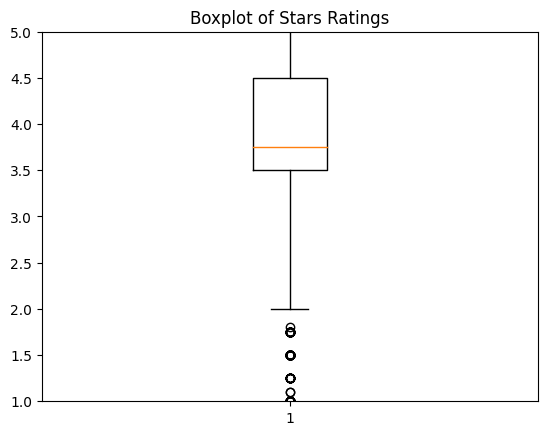

In [92]:
dataset = pd.read_csv('/content/The-Big-List-20231127-Reviews-to-4650.csv', encoding='latin1')  # 인코딩이 필요한 경우 변경

# 'Stars' 컬럼의 비숫자 값을 NaN으로 변환
dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')

# NaN 값 제거
dataset = dataset.dropna(subset=['Stars'])

# 'Stars' 컬럼에 대한 박스플롯 생성
plt.boxplot(dataset['Stars'])
plt.title('Boxplot of Stars Ratings')
plt.ylim(1, 5)  # y축 범위를 1에서 5로 설정
plt.show()